<a href="https://colab.research.google.com/github/fengyankai/CHL5230-Datathon-5/blob/Codes/Datathon_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Datathon #5**

## Setup

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')

In [5]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# load data
data = pd.read_csv('/content/drive/My Drive/CHL5230/Datathon #5/mhealth.csv')

In [5]:
#Import dataset for Brenleigh
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data= pd.read_csv('/content/drive/MyDrive/ML_Course/mhealth.csv')

Mounted at /content/drive


FileNotFoundError: ignored

## Data cleaning and prelim analyses

In [147]:
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [115]:
# Group the dataset by the 'subject' column and apply the `len` function
# to each group. This counts the number of records for each patient.
data.groupby('subject').apply(len)

subject
subject1    161280
subject2    130561
subject3    122112
subject4    116736
subject5    119808
subject6     98304
subject7    104448
subject8    129024
subject9     17726
dtype: int64

In [148]:
# create a subset of random rows in case the full dataset is too computationally intensive
data_subset = data.sample(n=100000,random_state=42)

In [117]:
# observations in full dataset
data.apply(len)

alx         999999
aly         999999
alz         999999
glx         999999
gly         999999
glz         999999
arx         999999
ary         999999
arz         999999
grx         999999
gry         999999
grz         999999
Activity    999999
subject     999999
dtype: int64

In [118]:
# observations in subset dataset
data_subset.apply(len)

alx         100000
aly         100000
alz         100000
glx         100000
gly         100000
glz         100000
arx         100000
ary         100000
arz         100000
grx         100000
gry         100000
grz         100000
Activity    100000
subject     100000
dtype: int64

In [119]:
# Calculating the number of missing values in each column of the sampled dataset
data.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

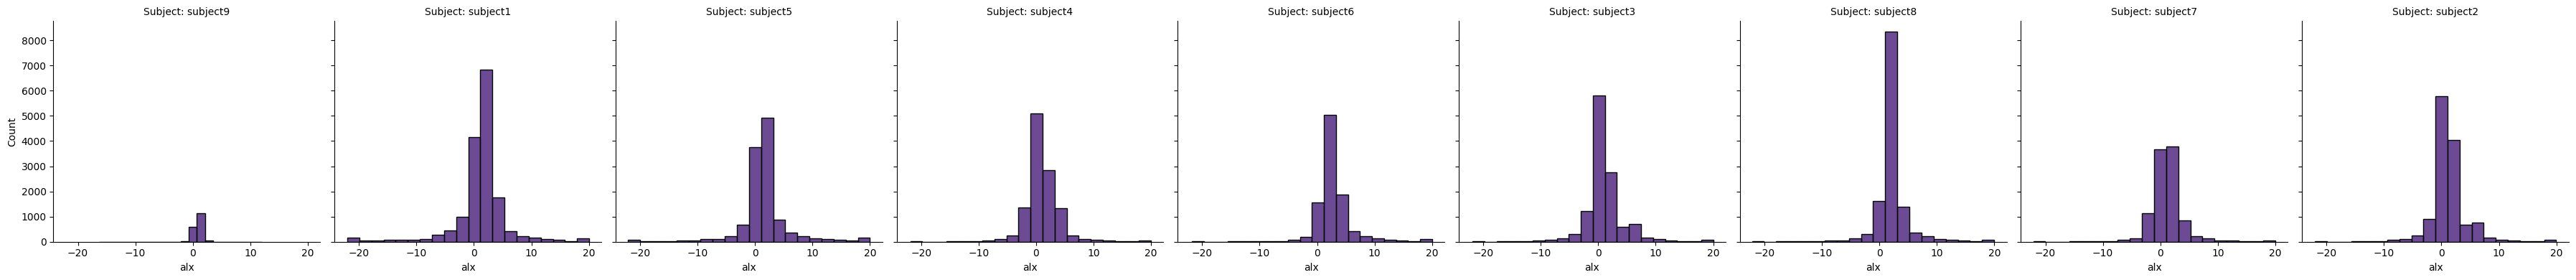

In [120]:
# For the FacetGrid, we'll use a single color instead of a palette, since 'palette' argument doesn't apply to FacetGrid directly.
# We'll select a color from the 'magma' colormap.

# Get a color from the 'magma' colormap
color = plt.get_cmap('magma')(0.2)  # 0.6 is arbitrarily chosen to get a distinct color from the colormap

# Create a FacetGrid using the 'subject' feature for faceting and map a histogram to it
g = sns.FacetGrid(data_subset, col='subject', height=4, aspect=1)
g.map(sns.histplot, 'alx', bins=20, kde=False, color=color)

# Adding titles and labels for clarity
g.set_titles('Subject: {col_name}')
g.set_xlabels('alx')
g.set_ylabels('Count')

# Display the FacetGrid
plt.show()


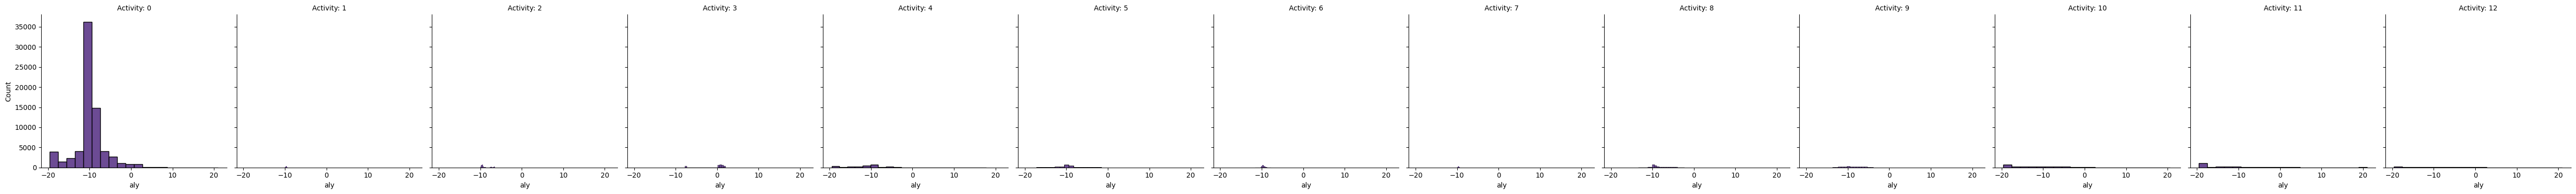

In [15]:
# For the FacetGrid, we'll use a single color instead of a palette, since 'palette' argument doesn't apply to FacetGrid directly.
# We'll select a color from the 'magma' colormap.

# Get a color from the 'magma' colormap
color = plt.get_cmap('magma')(0.2)  # 0.6 is arbitrarily chosen to get a distinct color from the colormap

# Create a FacetGrid using the 'subject' feature for faceting and map a histogram to it
g = sns.FacetGrid(data_subset, col='Activity', height=4, aspect=1)
g.map(sns.histplot, 'aly', bins=20, kde=False, color=color)

# Adding titles and labels for clarity
g.set_titles('Activity: {col_name}')
g.set_xlabels('aly')
g.set_ylabels('Count')

# Display the FacetGrid
plt.show()

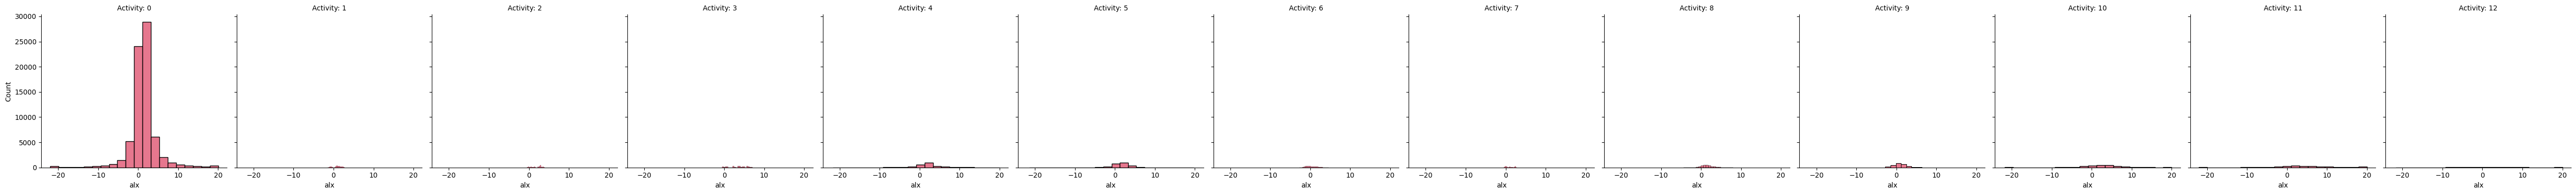

In [16]:
# For the FacetGrid, we'll use a single color instead of a palette, since 'palette' argument doesn't apply to FacetGrid directly.
# We'll select a color from the 'magma' colormap.

# Get a color from the 'magma' colormap
color = plt.get_cmap('magma')(0.6)  # 0.6 is arbitrarily chosen to get a distinct color from the colormap

# Create a FacetGrid using the 'subject' feature for faceting and map a histogram to it
g = sns.FacetGrid(data_subset, col='Activity', height=4, aspect=1)
g.map(sns.histplot, 'alx', bins=20, kde=False, color=color)

# Adding titles and labels for clarity
g.set_titles('Activity: {col_name}')
g.set_xlabels('alx')
g.set_ylabels('Count')

# Display the FacetGrid
plt.show()

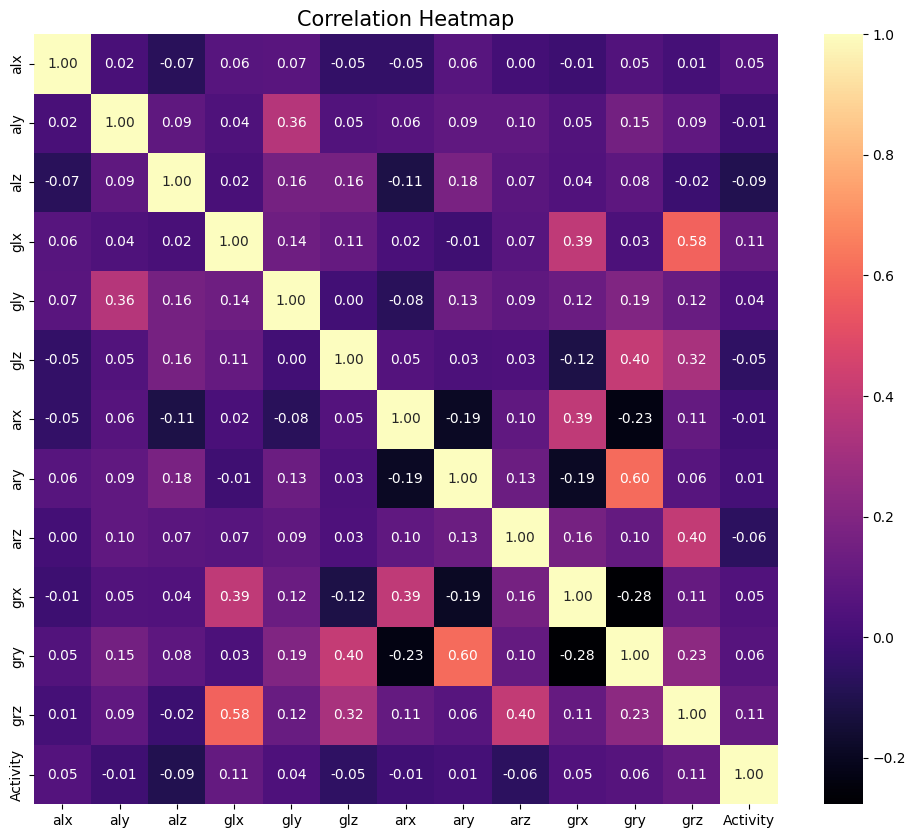

In [121]:
# For the correlation heatmap, we'll use only numerical columns.
# We'll update the list of numerical features to exclude columns with '_id' in their names.
numerical_features = [
    col for col in data_subset.select_dtypes(include=[np.number]).columns
    if not col.endswith('_id')
]

# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = data_subset[numerical_features].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

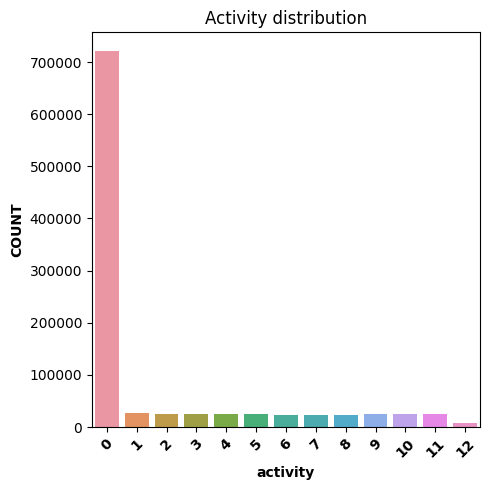

In [149]:
#general distribution of activity classes

import matplotlib.pyplot as plt
import seaborn as sns

# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Race Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data=data)
plt.title('Activity distribution')
plt.xlabel('activity', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
fig = plt.gcf()
plt.show()

##ML Pipeline

In [150]:
# Make subject a numerical variable
data_subset['subject'].replace({"subject1" :1, "subject2" :2, "subject3":3, "subject4":4, "subject5":5, "subject6":6, "subject7":7, "subject8":8, "subject9":9}, inplace=True)


In [151]:
#remove subject 9
data_subset = data_subset[data_subset['subject'] != 9]

Splitting data set into train (6 groups) and test (2 groups)

In [152]:
from sklearn.model_selection import train_test_split

# Grouping by subject and creating a list of dataframes, one per group
grouped = data_subset.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=5)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((73185, 14), (25019, 14))

Standardize the data

In [153]:
from sklearn.preprocessing import StandardScaler

numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')
numerical_columns.remove('subject')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
567130,-0.166336,0.201481,-0.802539,-1.294053,-0.417003,-0.274893,0.758887,-0.880022,-0.963999,-0.917198,-0.372176,0.045094,8,5
577745,0.022933,0.043521,0.260091,-1.196700,-0.584647,0.505683,-1.312081,1.188767,-0.545043,-0.828762,1.940978,-0.979408,0,5
625691,-0.540732,-0.316735,-0.585242,0.727087,-0.692825,0.060152,-0.053084,0.044301,0.306841,-0.858247,0.609061,0.858455,0,5
543082,-0.280669,2.566395,2.006268,0.177994,4.612434,1.728215,0.734445,1.902723,1.410140,1.824242,1.533624,0.842815,3,5
568670,-0.711189,-1.540098,0.397654,-0.293212,0.405018,-1.483166,1.121430,0.032747,1.750673,1.621587,-1.257787,0.029454,0,5


In [154]:
#check to see even distribution of subjects in training set
subject_counts = train_df['subject'].value_counts()

print(subject_counts)

1    16246
2    13081
5    12046
4    11636
7    10281
6     9895
Name: subject, dtype: int64


In [155]:
#check to see class imbalence for activity type
subject_counts = train_df['Activity'].value_counts()
print(subject_counts)

0     52555
9      1896
2      1890
4      1881
1      1855
3      1846
5      1846
11     1800
8      1792
10     1783
6      1727
7      1692
12      622
Name: Activity, dtype: int64


Now we are trying to create subsets of the data for each activity class

In [156]:
from sklearn.utils import resample

# Grouping the original training data by 'patient_nbr'
grouped_by_subject = train_df.groupby('subject')

# Creating separate lists for each class
groups_class_0 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 0] for subject in grouped_by_subject.groups]
groups_class_1 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 1] for subject in grouped_by_subject.groups]
groups_class_2 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 2] for subject in grouped_by_subject.groups]
groups_class_3 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 3] for subject in grouped_by_subject.groups]
groups_class_4 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 4] for subject in grouped_by_subject.groups]
groups_class_5 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 5] for subject in grouped_by_subject.groups]
groups_class_6 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 6] for subject in grouped_by_subject.groups]
groups_class_7 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 7] for subject in grouped_by_subject.groups]
groups_class_8 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 8] for subject in grouped_by_subject.groups]
groups_class_9 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 9] for subject in grouped_by_subject.groups]
groups_class_10 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 10] for subject in grouped_by_subject.groups]
groups_class_11 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 11] for subject in grouped_by_subject.groups]
groups_class_12 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity'] == 12] for subject in grouped_by_subject.groups]



In [157]:
groups_class_0 = [df for df in groups_class_0 if not df.empty]
groups_class_1 = [df for df in groups_class_1 if not df.empty]
groups_class_2 = [df for df in groups_class_2 if not df.empty]
groups_class_3 = [df for df in groups_class_3 if not df.empty]
groups_class_4 = [df for df in groups_class_4 if not df.empty]
groups_class_5 = [df for df in groups_class_5 if not df.empty]
groups_class_6 = [df for df in groups_class_6 if not df.empty]
groups_class_7 = [df for df in groups_class_7 if not df.empty]
groups_class_8 = [df for df in groups_class_8 if not df.empty]
groups_class_9 = [df for df in groups_class_9 if not df.empty]
groups_class_10 = [df for df in groups_class_10 if not df.empty]
groups_class_11 = [df for df in groups_class_11 if not df.empty]
groups_class_12 = [df for df in groups_class_12 if not df.empty]

Now we reshape all of the activities to be the same length. Down sample activity 0 and upample the rest

In [158]:
#change this function to the activity as needed
max_length_index = max(range(len(groups_class_11)), key=lambda i: len(groups_class_11[i]))

groups_class_11_balanced = []

for i in range(len(groups_class_11)):
    if i == max_length_index:
        groups_class_11_balanced.append(groups_class_11[i])
    else:
        balanced_group_df = resample(groups_class_11[i], replace=True, n_samples=len(groups_class_11[max_length_index]), random_state=42)
        groups_class_11_balanced.append(balanced_group_df)

In [159]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm

# Oversampling the minority groups
# Using resample to duplicate records in groups to match the number of records in the second highest activity class NOTE THIS TIME ITS 11 - BEFORE IT WAS 1
#SO IT WILL CHANGE EACH TIME YOU RUN THE CODE SINCE WE ARE RANDOMALLY SAMPING DATA

# Helper function
def oversample_class(groups_class, groups_class_11):
    oversampled_groups = []

    for i in range(len(groups_class)):
        oversampled_group_df = resample(groups_class[i], replace=True, n_samples=len(groups_class_11[i]), random_state=42)
        oversampled_groups.append(oversampled_group_df)

    return oversampled_groups

# Call the function for each class
oversampled_groups_class_0 = oversample_class(groups_class_0, groups_class_11_balanced)
oversampled_groups_class_1 = oversample_class(groups_class_1, groups_class_11_balanced)
oversampled_groups_class_2 = oversample_class(groups_class_2, groups_class_11_balanced)
oversampled_groups_class_3 = oversample_class(groups_class_3, groups_class_11_balanced)
oversampled_groups_class_4 = oversample_class(groups_class_4, groups_class_11_balanced)
oversampled_groups_class_5 = oversample_class(groups_class_5, groups_class_11_balanced)
oversampled_groups_class_6 = oversample_class(groups_class_6, groups_class_11_balanced)
oversampled_groups_class_7 = oversample_class(groups_class_7, groups_class_11_balanced)
oversampled_groups_class_8 = oversample_class(groups_class_8, groups_class_11_balanced)
oversampled_groups_class_9 = oversample_class(groups_class_9, groups_class_11_balanced)
oversampled_groups_class_10 = oversample_class(groups_class_10, groups_class_11_balanced)
oversampled_groups_class_12 = oversample_class(groups_class_12, groups_class_11_balanced)


In [160]:
# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
balanced_groups = oversampled_groups_class_0 +groups_class_11_balanced +oversampled_groups_class_2 +oversampled_groups_class_3 +oversampled_groups_class_4 +oversampled_groups_class_5 +oversampled_groups_class_6 +oversampled_groups_class_7 +oversampled_groups_class_8 +oversampled_groups_class_9 +oversampled_groups_class_10 +oversampled_groups_class_1 +oversampled_groups_class_12
balanced_groups_copy = []
i = 0
# Looping over each group in the balanced dataset
for i, group in tqdm(enumerate(balanced_groups)):
    # Assigning a new, unique identifier to each record in the group
    group.loc[:,'subject'] = i
    # Incrementing the identifier for the next group
    i += 1
    # Appending a copy of the modified group to the balanced_groups_copy list
    balanced_groups_copy.append(group.copy())

78it [00:00, 1939.53it/s]


In [161]:
print(train_df.groupby('subject').apply(lambda x : x.iloc[:]['Activity']).value_counts())

0     52555
9      1896
2      1890
4      1881
1      1855
3      1846
5      1846
11     1800
8      1792
10     1783
6      1727
7      1692
12      622
Name: Activity, dtype: int64


In [162]:
# Reassembling the balanced training dataset
train_df_balanced = pd.concat(balanced_groups_copy, ignore_index=True)

# Checking the new class distribution in the balanced dataset
print(train_df_balanced.groupby('subject').apply(lambda x : x.iloc[:]['Activity']).value_counts())

0     1878
11    1878
2     1878
3     1878
4     1878
5     1878
6     1878
7     1878
8     1878
9     1878
10    1878
1     1878
12    1878
Name: Activity, dtype: int64


In [66]:
train_df_balanced

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,-0.004274,-0.076829,-0.474938,0.107897,0.102158,-1.500982,2.049380,1.643831,0.084300,1.404181,0.747212,1.402068,0,0
1,0.009343,0.025697,0.212582,-0.573601,-0.719863,-0.738239,-0.176945,0.288204,-0.098202,-0.696127,-0.549295,-1.077169,0,0
2,0.091760,-0.020353,0.262082,-0.659284,-0.800975,-0.535067,1.026755,1.596805,0.695171,-0.091827,1.267937,1.382473,0,0
3,-0.098714,-0.074173,0.095083,0.045589,2.032817,0.944083,0.078696,-0.614913,-0.564847,-0.511888,0.506328,-0.330306,0,0
4,-0.047589,0.857301,-1.205426,-0.012827,-1.147102,-0.082425,0.005667,-0.836342,-0.747598,-1.138288,0.063539,0.287535,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24409,-0.815341,2.082079,0.887718,0.329866,-0.714444,0.847858,0.277227,1.165518,-0.067993,0.096095,-0.542205,0.905375,12,77
24410,-1.312463,-2.300976,-1.390025,0.201361,-0.617103,1.065271,-0.496938,-2.306312,0.406315,0.033461,-0.102953,1.202556,12,77
24411,2.559207,2.170524,-2.817555,0.139053,0.594281,1.760290,1.989808,3.291233,0.964128,0.693028,-0.609502,0.936656,12,77
24412,0.304199,0.612678,0.363423,0.544051,-0.481916,1.061698,0.794735,1.097786,-0.720729,0.254551,-0.503234,1.018776,12,77


In [227]:
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_df_balanced, sequence_length=1500)
X_test, y_test = create_sequences(test_df, sequence_length=1500)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16, 1500, 12), (16,), (16, 1500, 12), (16,))

#LSTM NN

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 512  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 30
learning_rate = 0.0001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

In [ ]:
#Making a smaller sequence length
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train2, y_train2 = create_sequences(train_df_balanced, sequence_length=100)
X_test2, y_test2 = create_sequences(test_df, sequence_length=100)

X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

In [1]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 50
learning_rate = 0.0001
batch_size = 256
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train2, dtype=t.float32), t.tensor(y_train2, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test2, dtype=t.float32), t.tensor(y_test2, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

NameError: ignored

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#RNN

In [164]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 512  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 30
learning_rate = 0.0001
batch_size = 512
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/30 ---> Train Accuracy: 12.5%, Validation Accuracy: 0.0%
Epoch 1/30 ---> Train Accuracy: 12.5%, Validation Accuracy: 0.0%
Epoch 2/30 ---> Train Accuracy: 12.5%, Validation Accuracy: 0.0%
Epoch 3/30 ---> Train Accuracy: 16.666666666666668%, Validation Accuracy: 0.0%
Epoch 4/30 ---> Train Accuracy: 20.833333333333332%, Validation Accuracy: 0.0%
Epoch 5/30 ---> Train Accuracy: 25.0%, Validation Accuracy: 0.0%
Epoch 6/30 ---> Train Accuracy: 37.5%, Validation Accuracy: 0.0%
Epoch 7/30 ---> Train Accuracy: 41.666666666666664%, Validation Accuracy: 0.0%
Epoch 8/30 ---> Train Accuracy: 41.666666666666664%, Validation Accuracy: 0.0%
Epoch 9/30 ---> Train Accuracy: 45.833333333333336%, Validation Accuracy: 0.0%
Epoch 10/30 ---> Train Accuracy: 45.833333333333336%, Validation Accuracy: 0.0%
Epoch 11/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 0.0%
Epoch 12/30 ---> Train Accuracy: 54.166666666666664%, Validation Accuracy: 0.0%
Epoch 13/30 ---> Train Accuracy: 54.166666666666664%, 

In [165]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 512  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 50
learning_rate = 0.001
batch_size = 256
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/50 ---> Train Accuracy: 25.0%, Validation Accuracy: 4.0%
Epoch 1/50 ---> Train Accuracy: 58.333333333333336%, Validation Accuracy: 16.0%
Epoch 2/50 ---> Train Accuracy: 66.66666666666667%, Validation Accuracy: 12.0%
Epoch 3/50 ---> Train Accuracy: 62.5%, Validation Accuracy: 16.0%
Epoch 4/50 ---> Train Accuracy: 50.0%, Validation Accuracy: 12.0%
Epoch 5/50 ---> Train Accuracy: 25.0%, Validation Accuracy: 4.0%
Epoch 6/50 ---> Train Accuracy: 70.83333333333333%, Validation Accuracy: 24.0%
Epoch 7/50 ---> Train Accuracy: 58.333333333333336%, Validation Accuracy: 4.0%
Epoch 8/50 ---> Train Accuracy: 25.0%, Validation Accuracy: 8.0%
Epoch 9/50 ---> Train Accuracy: 20.833333333333332%, Validation Accuracy: 4.0%
Epoch 10/50 ---> Train Accuracy: 16.666666666666668%, Validation Accuracy: 4.0%
Epoch 11/50 ---> Train Accuracy: 50.0%, Validation Accuracy: 0.0%
Epoch 12/50 ---> Train Accuracy: 50.0%, Validation Accuracy: 8.0%
Epoch 13/50 ---> Train Accuracy: 62.5%, Validation Accuracy: 16.0

KeyboardInterrupt: ignored

In [229]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 128  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 200
learning_rate = 0.001
batch_size = 256
landa = 0.00001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/200 ---> Train Accuracy: 12.5%, Validation Accuracy: 37.5%
Epoch 1/200 ---> Train Accuracy: 12.5%, Validation Accuracy: 37.5%
Epoch 2/200 ---> Train Accuracy: 18.75%, Validation Accuracy: 43.75%
Epoch 3/200 ---> Train Accuracy: 31.25%, Validation Accuracy: 43.75%
Epoch 4/200 ---> Train Accuracy: 31.25%, Validation Accuracy: 43.75%
Epoch 5/200 ---> Train Accuracy: 37.5%, Validation Accuracy: 43.75%
Epoch 6/200 ---> Train Accuracy: 37.5%, Validation Accuracy: 43.75%
Epoch 7/200 ---> Train Accuracy: 50.0%, Validation Accuracy: 43.75%
Epoch 8/200 ---> Train Accuracy: 50.0%, Validation Accuracy: 43.75%
Epoch 9/200 ---> Train Accuracy: 62.5%, Validation Accuracy: 43.75%
Epoch 10/200 ---> Train Accuracy: 62.5%, Validation Accuracy: 37.5%
Epoch 11/200 ---> Train Accuracy: 62.5%, Validation Accuracy: 37.5%
Epoch 12/200 ---> Train Accuracy: 62.5%, Validation Accuracy: 37.5%
Epoch 13/200 ---> Train Accuracy: 56.25%, Validation Accuracy: 43.75%
Epoch 14/200 ---> Train Accuracy: 56.25%, Val

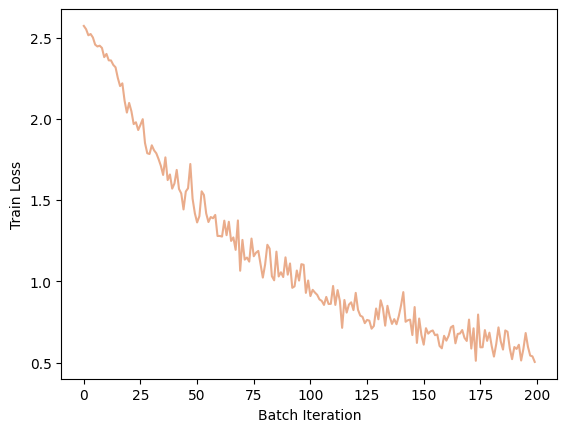

In [230]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

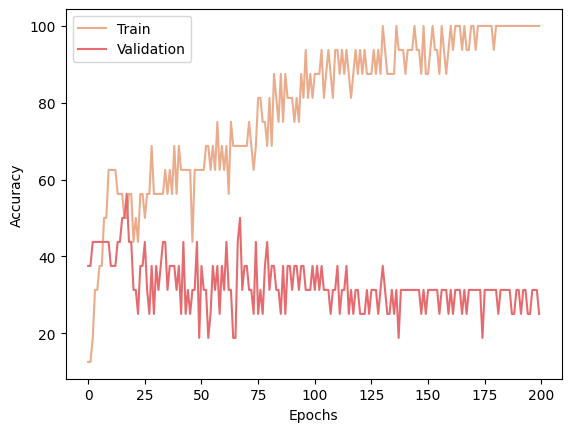

In [231]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [232]:
from sklearn.metrics import confusion_matrix, classification_report

# After the training loop
rnn_layer1.eval()
fc_layer1.eval()
fc_layer2.eval()

# Initialize lists for true labels and predicted labels on the training set
true_labels_train = []
predicted_labels_train = []

with t.no_grad():
    for X, Y in train_data_loader:
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]
        out = relu(fc_layer1(out))
        out = fc_layer2(out)
        _, predicted = t.max(out.data, 1)

        # Append true and predicted labels to the lists
        true_labels_train.extend(Y.cpu().numpy())
        predicted_labels_train.extend(predicted.cpu().numpy())

# Create confusion matrix and classification report for the training set
conf_matrix_train = confusion_matrix(true_labels_train, predicted_labels_train)
class_report_train = classification_report(true_labels_train, predicted_labels_train)

# Print the confusion matrix and classification report for the training set
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)
print("\nClassification Report (Training Set):")
print(class_report_train)

Confusion Matrix (Training Set):
[[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
        

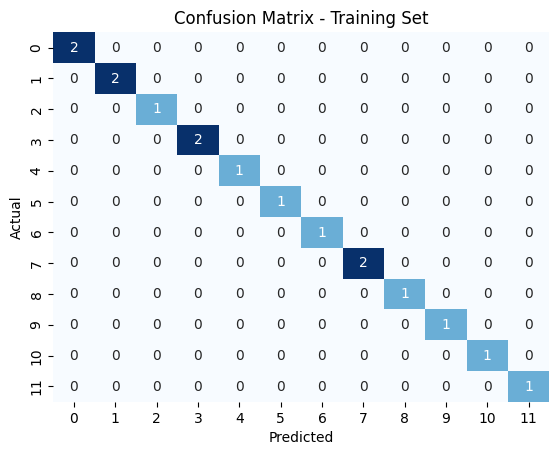

In [233]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Training Set')
plt.show()

In [234]:
rnn_layer1.eval()
fc_layer1.eval()
fc_layer2.eval()

# Initialize lists for true labels and predicted labels on the validation set
true_labels_val = []
predicted_labels_val = []

with t.no_grad():
    for X, Y in test_data_loader:
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]
        out = relu(fc_layer1(out))
        out = fc_layer2(out)
        _, predicted = t.max(out.data, 1)

        # Append true and predicted labels to the lists
        true_labels_val.extend(Y.cpu().numpy())
        predicted_labels_val.extend(predicted.cpu().numpy())

# Create confusion matrix and classification report for the validation set
conf_matrix_val = confusion_matrix(true_labels_val, predicted_labels_val)
class_report_val = classification_report(true_labels_val, predicted_labels_val)

# Print the confusion matrix and classification report for the validation set
print("Confusion Matrix (Validation Set):")
print(conf_matrix_val)
print("\nClassification Report (Validation Set):")
print(class_report_val)

Confusion Matrix (Validation Set):
[[3 2 1 1 0 5 1]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           5       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

    accuracy                           0.25        16
   macro avg       0.21      0.18      0.15        16
weighted avg       0.84      0.25      0.35        16



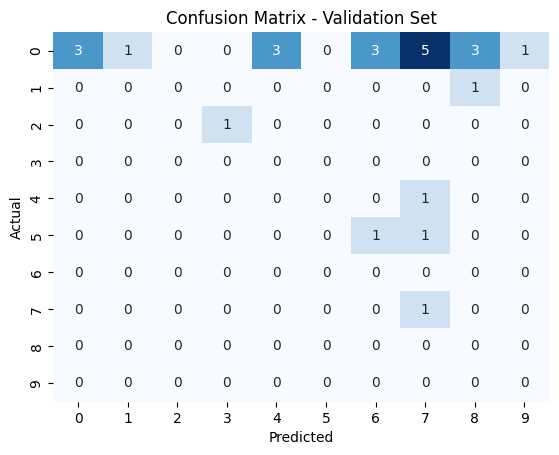

In [177]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Validation Set')
plt.show()

In [243]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 13  # For 13-class classification
epochs = 100
learning_rate = 0.001
batch_size = 256
landa = 0.0001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

Epoch 0/100 ---> Train Accuracy: 6.25%, Validation Accuracy: 0.0%
Epoch 1/100 ---> Train Accuracy: 18.75%, Validation Accuracy: 0.0%
Epoch 2/100 ---> Train Accuracy: 37.5%, Validation Accuracy: 0.0%
Epoch 3/100 ---> Train Accuracy: 56.25%, Validation Accuracy: 0.0%
Epoch 4/100 ---> Train Accuracy: 62.5%, Validation Accuracy: 0.0%
Epoch 5/100 ---> Train Accuracy: 75.0%, Validation Accuracy: 0.0%
Epoch 6/100 ---> Train Accuracy: 75.0%, Validation Accuracy: 6.25%
Epoch 7/100 ---> Train Accuracy: 81.25%, Validation Accuracy: 6.25%
Epoch 8/100 ---> Train Accuracy: 68.75%, Validation Accuracy: 18.75%
Epoch 9/100 ---> Train Accuracy: 68.75%, Validation Accuracy: 31.25%
Epoch 10/100 ---> Train Accuracy: 50.0%, Validation Accuracy: 18.75%
Epoch 11/100 ---> Train Accuracy: 62.5%, Validation Accuracy: 18.75%
Epoch 12/100 ---> Train Accuracy: 68.75%, Validation Accuracy: 18.75%
Epoch 13/100 ---> Train Accuracy: 62.5%, Validation Accuracy: 25.0%
Epoch 14/100 ---> Train Accuracy: 62.5%, Validation A

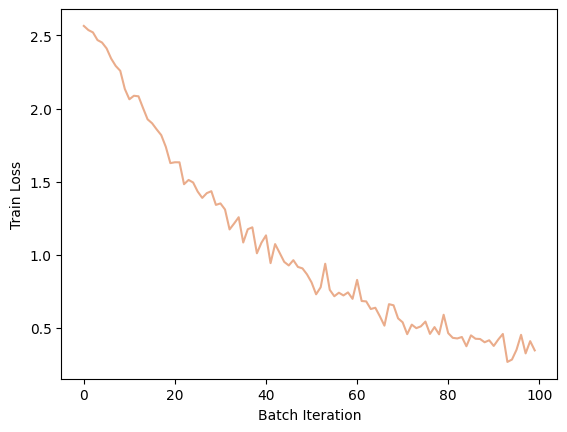

In [244]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

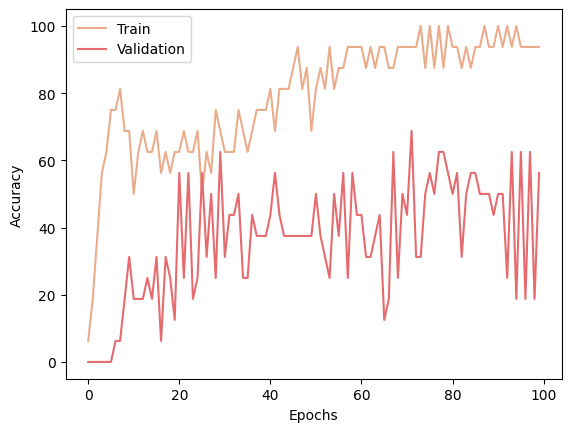

In [245]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()